In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Churn_Modelling.csv")
data.tail(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9990,9991,15798964,Nkemakonam,714,Germany,Male,33,3,35016.60,1,1,0,53667.08,0
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9992,9993,15657105,Chukwualuka,726,Spain,Male,36,2,0.00,1,1,0,195192.40,0
9993,9994,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9994,9995,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [3]:
data.drop(['RowNumber', 'CustomerId' , 'Surname'] , axis = 1 , inplace = True)

In [4]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
# Check if Data has any null values 
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
# Check for Object datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [7]:
# Label encode Object Datatypes 
from sklearn.preprocessing import LabelEncoder
data_types_dict = dict(data.dtypes)
# Keep track Mappings Column name to LabelEncoders
Label_encoder_collection = {}
for col_name , data_type in data_types_dict.items():
    if data_type == 'object':
        Le = LabelEncoder()
        data[col_name] = Le.fit_transform(data[col_name])
        Label_encoder_collection[col_name] = Le 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int32  
 2   Gender           10000 non-null  int32  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int32(2), int64(7)
memory usage: 781.4 KB


In [8]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [9]:
X = data.iloc[: , :-1].values
Y = data.iloc[: , -1].values

In [102]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(X)

array([[-0.32622142, -0.90188624, -1.09598752, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-0.44003595,  1.51506738, -1.09598752, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.53679418, -0.90188624, -1.09598752, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 0.60498839, -0.90188624, -1.09598752, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.25683526,  0.30659057,  0.91241915, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.46377078, -0.90188624, -1.09598752, ...,  0.64609167,
        -1.03067011, -1.07636976]])

In [196]:
from sklearn.model_selection import train_test_split
Xtrain , Xtest , Ytrain , Ytest = train_test_split(X , Y , test_size = 0.2 , random_state = 0,shuffle=True)

In [197]:
Xtrain.shape

(8000, 10)

# ML Algorithms

# kNN 

In [198]:
from sklearn.neighbors import KNeighborsClassifier
cls=KNeighborsClassifier(n_neighbors=5)
cls.fit(Xtrain,Ytrain)

KNeighborsClassifier()

In [199]:
cls.score(Xtrain,Ytrain)

0.816

In [200]:
cls.score(Xtest,Ytest)

0.7645

In [201]:
y_pred = cls.predict(Xtest)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [202]:
#model evaluation,confusion matrix and classification report
from sklearn.metrics import confusion_matrix ,classification_report
cm=confusion_matrix(Ytest,y_pred)
print(cm)

[[1483  112]
 [ 359   46]]


In [203]:
print(classification_report(Ytest,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86      1595
           1       0.29      0.11      0.16       405

    accuracy                           0.76      2000
   macro avg       0.55      0.52      0.51      2000
weighted avg       0.70      0.76      0.72      2000



# ANN

In [204]:
import tensorflow as tf
from tensorflow import keras

In [205]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(10,),activation='relu'), #input shape
    keras.layers.Dense(8,activation='relu'), #hidden layer
    keras.layers.Dense(1,activation='sigmoid') #output layer
])
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 10)                110       
                                                                 
 dense_34 (Dense)            (None, 8)                 88        
                                                                 
 dense_35 (Dense)            (None, 1)                 9         
                                                                 
Total params: 207
Trainable params: 207
Non-trainable params: 0
_________________________________________________________________


In [206]:
history = model.fit(Xtrain , Ytrain ,validation_split=0.1 , epochs=50)

Epoch 1/50
225/225 [==============================] - 1s 2ms/step - loss: 4641.3320 - accuracy: 0.6954 - val_loss: 519.7878 - val_accuracy: 0.7025
Epoch 2/50
225/225 [==============================] - 0s 2ms/step - loss: 142.9597 - accuracy: 0.6636 - val_loss: 26.3679 - val_accuracy: 0.7475
Epoch 3/50
225/225 [==============================] - 0s 2ms/step - loss: 27.3024 - accuracy: 0.6874 - val_loss: 56.4708 - val_accuracy: 0.5163
Epoch 4/50
225/225 [==============================] - 0s 2ms/step - loss: 31.3589 - accuracy: 0.6843 - val_loss: 21.4988 - val_accuracy: 0.4338
Epoch 5/50
225/225 [==============================] - 0s 2ms/step - loss: 32.6313 - accuracy: 0.6871 - val_loss: 45.4596 - val_accuracy: 0.7887
Epoch 6/50
225/225 [==============================] - 0s 2ms/step - loss: 22.8211 - accuracy: 0.6856 - val_loss: 33.5376 - val_accuracy: 0.7925
Epoch 7/50
225/225 [==============================] - 0s 2ms/step - loss: 25.0714 - accuracy: 0.6811 - val_loss: 22.0756 - val_accur

In [207]:
model.evaluate(Xtest,Ytest)

63/63 [==============================] - 0s 1ms/step - loss: 12.9554 - accuracy: 0.7940


[12.955400466918945, 0.7940000295639038]

In [208]:
Xtest

array([[5.9700000e+02, 1.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.9285267e+05],
       [5.2300000e+02, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 1.2870210e+05],
       [7.0600000e+02, 2.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 7.5732250e+04],
       ...,
       [5.7800000e+02, 2.0000000e+00, 1.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 1.4153319e+05],
       [6.5000000e+02, 1.0000000e+00, 1.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.1276480e+04],
       [5.7300000e+02, 1.0000000e+00, 1.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 1.9295060e+05]])

In [209]:
# collect predictions 
predictions = np.round(model.predict(Xtest))
predictions

63/63 [==============================] - 0s 1ms/step


array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

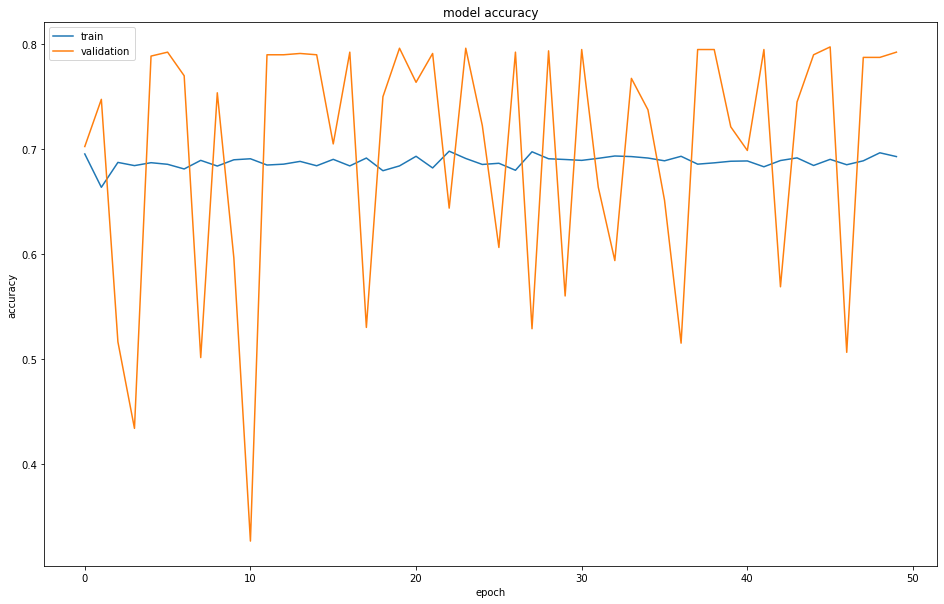

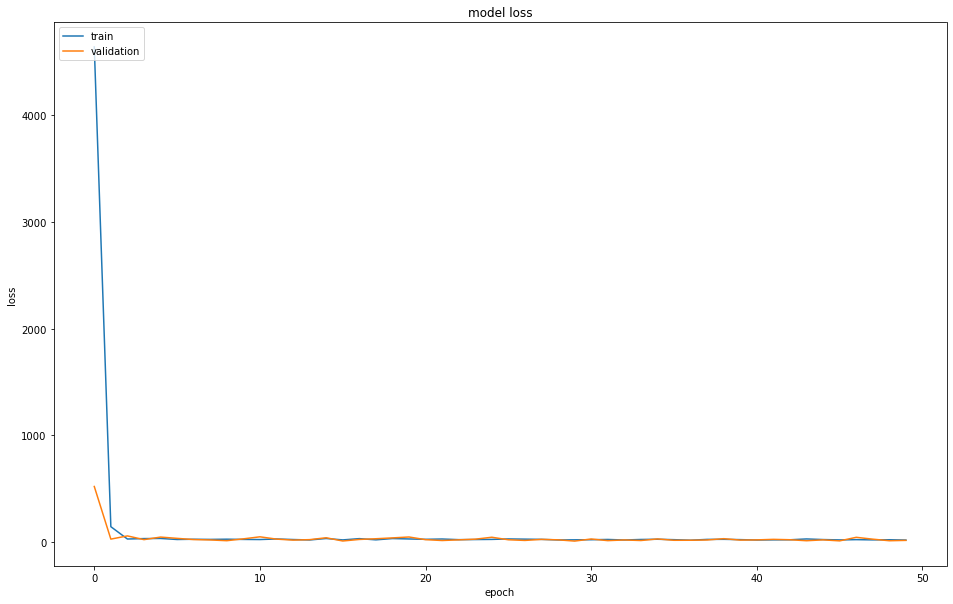

In [210]:
#  "Accuracy Plot"
plt.figure(figsize=(16,10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# "Loss Plot"
plt.figure(figsize=(16,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# We see a lot of fluctuations in Accuracy Graph which concludes model learning is unstable 

In [211]:
# Check Accuracy

Ytest

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [212]:
#model evaluation,confusion matrix and classification report
from sklearn.metrics import accuracy_score,confusion_matrix ,classification_report
cm=confusion_matrix(Ytest,predictions)
print(cm)
print(accuracy_score(Ytest,predictions))

[[1584   11]
 [ 401    4]]
0.794


In [213]:
print(classification_report(predictions,Ytest))

              precision    recall  f1-score   support

         0.0       0.99      0.80      0.88      1985
         1.0       0.01      0.27      0.02        15

    accuracy                           0.79      2000
   macro avg       0.50      0.53      0.45      2000
weighted avg       0.99      0.79      0.88      2000

